In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.patches import Ellipse
import numpy as np
import matplotlib.transforms as transforms

In [2]:
df = pd.read_excel('../data/hemp-gcms-threshold10-transpose.xlsx')
df

,Type1,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
0,1,12.63,15.35,0.00,0.00,0.0,0.00,20.09,0.00,0.00,0.00,0.00,16.42,0.00
1,1,0.00,0.00,0.00,0.00,0.0,0.00,22.93,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0.00,0.00,0.00,0.00,0.0,0.00,35.13,10.36,0.00,12.27,0.00,0.00,0.00
3,1,0.00,0.00,0.00,0.00,0.0,0.00,86.53,0.00,0.00,0.00,0.00,0.00,0.00
4,1,0.00,0.00,0.00,0.00,0.0,0.00,66.24,0.00,0.00,0.00,0.00,0.00,0.00
5,1,0.00,0.00,0.00,0.00,0.0,0.00,34.08,20.61,0.00,0.00,13.02,0.00,0.00
6,2,14.16,29.07,0.00,0.00,0.0,13.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,2,0.00,0.00,0.00,0.00,0.0,0.00,17.63,0.00,0.00,0.00,0.00,0.00,10.21
8,2,0.00,0.00,0.00,0.00,0.0,0.00,15.04,11.49,15.12,0.00,10.72,0.00,0.00
9,2,15.10,22.32,0.00,0.00,18.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [3]:
column_name = df.columns
column_name

Index(['Type1', 'Vitamin E succinate (calcium)', 'Clionasterol',
       'Gluco-octonic acid lactone', 'Guanosine', 'THC (Dronabino)',
       'Cannabidiol (CBD)', 'Linoleic acid (omega-6)',
       'Linoleic acid, ethyl ester', 'Linoleic acid, glyceryl ester',
       'Linolenic acid, ethyl ester', 'Oleic acid, ethyl ester',
       'Oleic acid, trans', 'Palmitic acid'],
      dtype='object')

In [4]:
df_type=df['Type1']
df_type

0     1
1     1
2     1
3     1
4     1
5     1
6     2
7     2
8     2
9     2
10    2
11    2
Name: Type1, dtype: int64

In [5]:
df_features = df.drop('Type1', axis=1)
df_features

,Vitamin E succinate (calcium),Clionasterol,Gluco-octonic acid lactone,Guanosine,THC (Dronabino),Cannabidiol (CBD),Linoleic acid (omega-6),"Linoleic acid, ethyl ester","Linoleic acid, glyceryl ester","Linolenic acid, ethyl ester","Oleic acid, ethyl ester","Oleic acid, trans",Palmitic acid
0,12.63,15.35,0.00,0.00,0.0,0.00,20.09,0.00,0.00,0.00,0.00,16.42,0.00
1,0.00,0.00,0.00,0.00,0.0,0.00,22.93,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.0,0.00,35.13,10.36,0.00,12.27,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.0,0.00,86.53,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.0,0.00,66.24,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.0,0.00,34.08,20.61,0.00,0.00,13.02,0.00,0.00
6,14.16,29.07,0.00,0.00,0.0,13.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.0,0.00,17.63,0.00,0.00,0.00,0.00,0.00,10.21
8,0.00,0.00,0.00,0.00,0.0,0.00,15.04,11.49,15.12,0.00,10.72,0.00,0.00
9,15.10,22.32,0.00,0.00,18.2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_features)
scaled_data

array([[ 1.50620343,  0.85863422, -0.30151134, -0.30151134, -0.30151134,
        -0.30151134, -0.17874035, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607,  3.31662479, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134, -0.07109817, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134,  0.3913084 ,  1.04243383, -0.30151134,  3.31662479,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134,  2.33948031, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.6615544 , -0.30151134, -0.30151134, -0.30151134,
        -0.30151134,  1.57044514, -0.54070047, -0.30151134, -0.30151134,
        -0.44471607, -0.30151134, -0.30151134],
       [-0.5753156 , -0.661554

In [7]:
pca = PCA(n_components=2)

In [8]:
pca_result = pca.fit_transform(scaled_data)

In [9]:
df_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [10]:
df_pca['Hemp type'] = df_type
df_pca

,PC1,PC2,Hemp type
0,2.059518,-0.515204,1
1,-0.366192,0.310985,1
2,-1.471739,-0.405492,1
3,-0.976906,0.086183,1
4,-0.782073,0.157900,1
5,-2.410544,-1.617242,1
6,3.494663,-0.868327,2
7,-0.458331,0.607117,2
8,-2.334034,-1.764249,2
9,3.121951,-0.717856,2


In [11]:
def confidence_ellipse(x, y, ax, n_std=2, facecolor='none', edgecolor='black', alpha=0.2, **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    The ellipse is centered at the mean of *x* and *y*.
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)

    ellipse = Ellipse(
        (np.mean(x), np.mean(y)),
        width=ell_radius_x * n_std * 3,
        height=ell_radius_y * n_std * 3,
        angle=np.rad2deg(np.arctan2(*cov[:, 0][::-1])),
        facecolor=color,      # use this instead of color
        edgecolor=color,      # edge outline color
        alpha=alpha,
        **kwargs
    )

    ax.add_patch(ellipse)

In [12]:
def add_jitter(arr, jitter_amount=0.02):
    """Add small random noise to prevent overlap."""
    return arr + np.random.normal(0, jitter_amount, size=arr.shape)

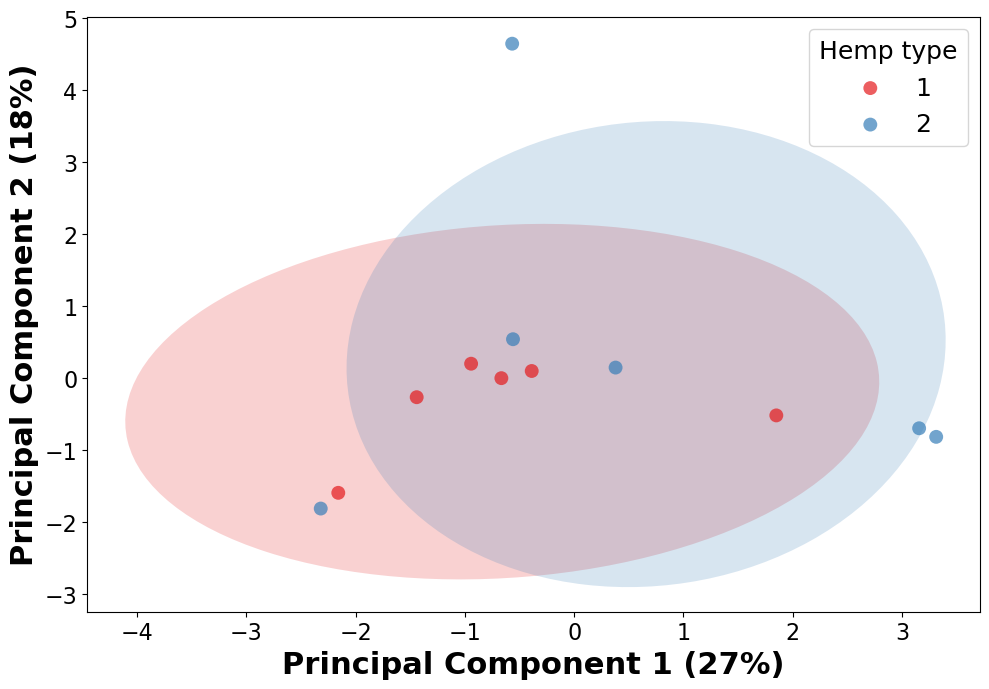

In [13]:
figure = plt.figure(figsize=(10, 7))
axis = figure.add_subplot(111)


colors = sns.color_palette("Set1", len(df_pca['Hemp type'].unique()))


labels = sorted(df_pca['Hemp type'].unique())


for i, label in enumerate(labels):
    color = colors[i]
    subset = df_pca[df_pca['Hemp type'] == label]
    confidence_ellipse(subset['PC1'], subset['PC2'], axis,
                   edgecolor=color, facecolor=color, alpha=0.2, linewidth=0, zorder=0)



for i, label in enumerate(labels):
    color = np.expand_dims(np.array(colors[i]), axis=0)
    subset = df_pca[df_pca['Hemp type'] == label]

    # Add jitter to prevent overlapping
    pc1_jit = add_jitter(subset['PC1'], jitter_amount=0.1)
    pc2_jit = add_jitter(subset['PC2'], jitter_amount=0.1)

    axis.scatter(pc1_jit, pc2_jit,
                 c=color, alpha=0.7, label=label,
                 edgecolor='none', s=100)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Principal Component 1 (27%)', fontsize=22, fontweight='bold')
plt.ylabel('Principal Component 2 (18%)', fontsize=22, fontweight='bold')
plt.legend(title='Hemp type', fontsize=18, title_fontsize=18)
axis.tick_params(axis='both', labelsize=16) # Set tick label font sizes
plt.grid(False)
plt.tight_layout()
#plt.savefig('rev_fig2left.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)

print("\nCumulative Explained Variance Ratio:")
print(cumulative_variance)

Explained Variance Ratio for each Principal Component:
[0.26890172 0.18365952]

Cumulative Explained Variance Ratio:
[0.26890172 0.45256124]


In [15]:
loadings = pca.components_.T  
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=df_features.columns)

print("PCA Loadings:")
print(loadings_df)

PCA Loadings:
                                    PC1       PC2
Vitamin E succinate (calcium)  0.481817 -0.170510
Clionasterol                   0.495211 -0.161760
Gluco-octonic acid lactone    -0.033506  0.574481
Guanosine                     -0.033506  0.574481
THC (Dronabino)                0.269273 -0.090653
Cannabidiol (CBD)              0.301420 -0.109655
Linoleic acid (omega-6)       -0.253347 -0.093257
Linoleic acid, ethyl ester    -0.334218 -0.308300
Linoleic acid, glyceryl ester -0.201314 -0.222796
Linolenic acid, ethyl ester   -0.126940 -0.051207
Oleic acid, ethyl ester       -0.302267 -0.313597
Oleic acid, trans              0.177637 -0.065062
Palmitic acid                 -0.039532  0.076669


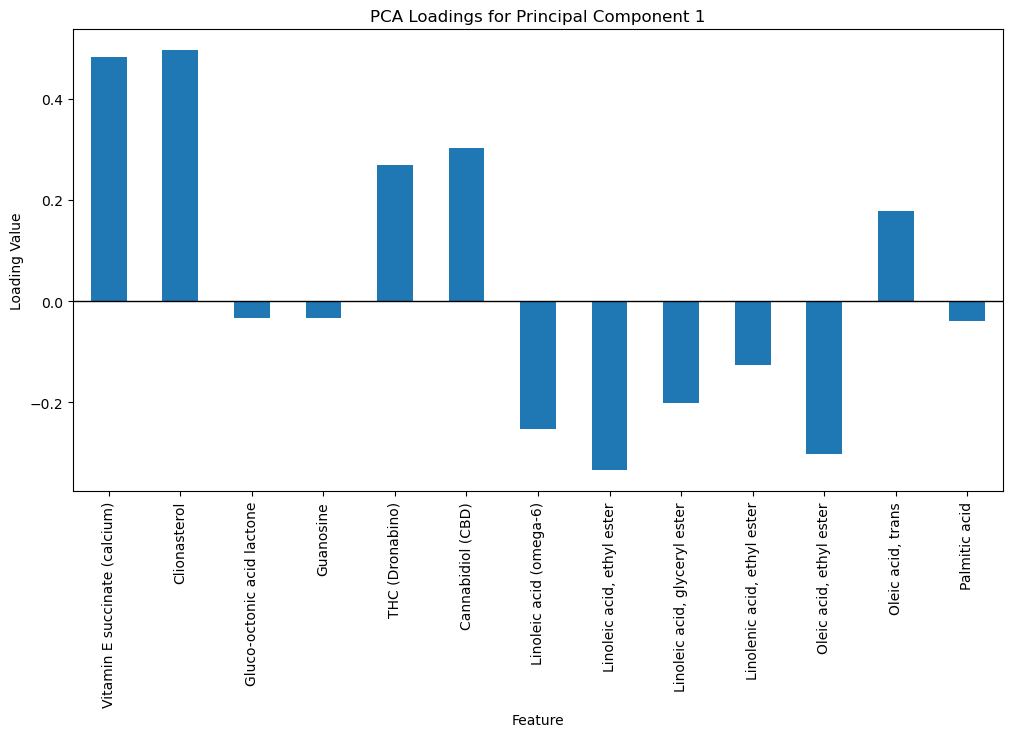

In [16]:
plt.figure(figsize=(12, 6))
loadings_df['PC1'].plot(kind='bar')
plt.title('PCA Loadings for Principal Component 1')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.grid(False)
plt.show()

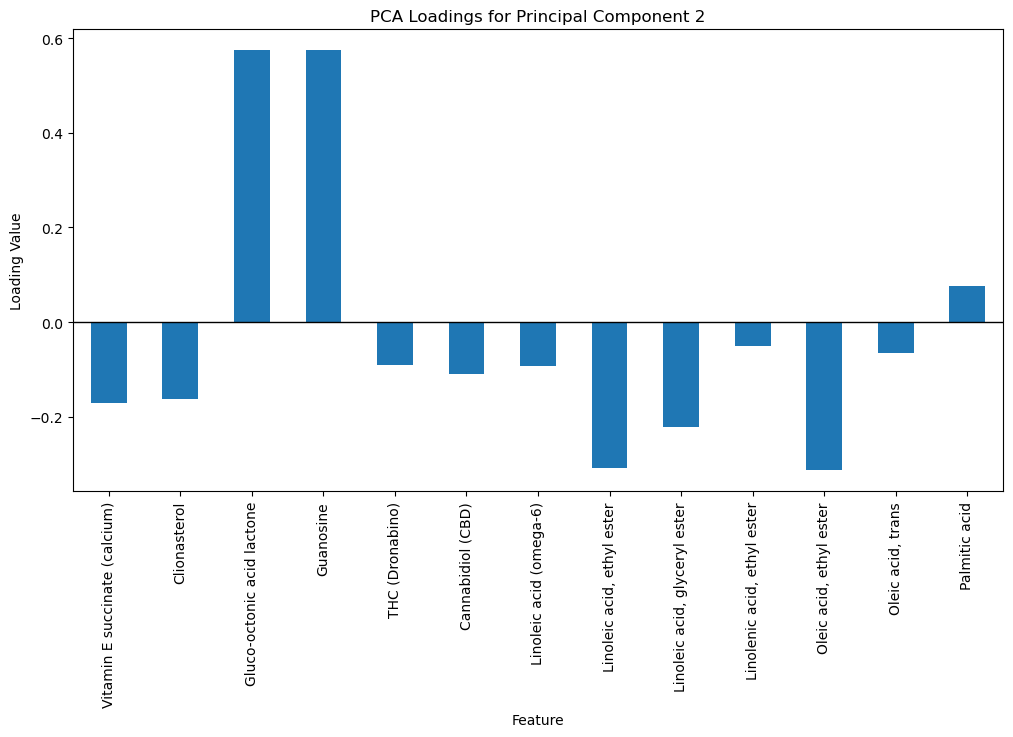

In [17]:
plt.figure(figsize=(12, 6))
loadings_df['PC2'].plot(kind='bar')
plt.title('PCA Loadings for Principal Component 2')
plt.xlabel('Feature')
plt.ylabel('Loading Value')
plt.grid(False)
plt.axhline(y=0, color='black', linestyle='-', linewidth=1)
plt.show()